## Data Science Project Process

+ Data Collection / Project Scoping <br>
+ Exploratory Data Analysis (EDA)<br>
+ Data Processing (Data Cleaning)<br>
+ Feature Engineering
+ Model Training (including cross-validation to hyper-pameters tuning)
+ Project Delivery / Comment

### Example: Kaggle - Credit Card Fraud Detection 

+ The datasets contains transactions made by credit cards in September 2013 by european cardholders.
+ Features V1, V2, ... V28 are the principal components obtained with PCA.
+ Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
+ Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
+ Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
+ This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
+ The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### Exploratory Data Analysis (EDA)

In [1]:
# import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data and overview
data = pd.read_csv('creditcard.csv')
data.head()
data.shape
data.info()
data.columns
data.describe()
data['Class'].value_counts()
data.isnull().sum()
data.isnull().sum().max() 
data.isnull().values.any() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

False

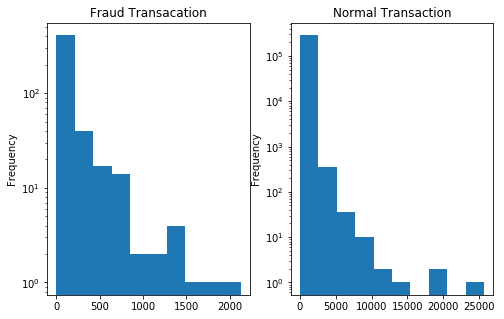

In [4]:
# histogram of amount
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(8,5)) #set the size of plot
plt.subplot(121) #set the form of plots and its position (121: nrow=1, ncol=2, plotnum=1)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.yscale('log')#set the y-axis scale. Logorithm transforamtion 
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")
plt.yscale('log')

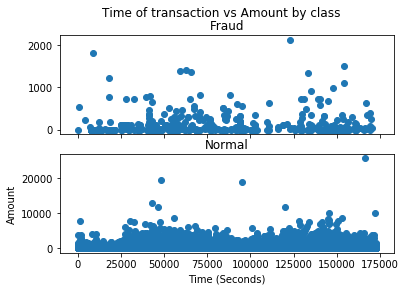

In [5]:
# Scatter plot of Amount and Time
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True) #f is the whole plot, ax1 & ax2 are subplots
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud_transacation.Time, Fraud_transacation.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal_transacation.Time, Normal_transacation.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amount')
plt.show()

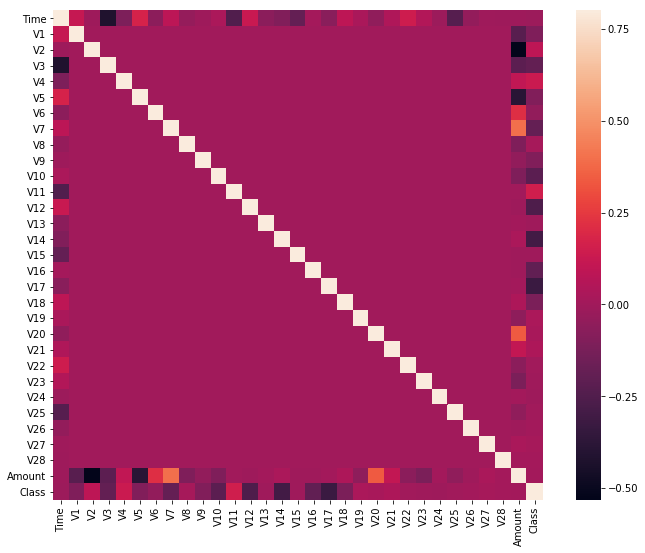

In [6]:
# Correlation 
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()


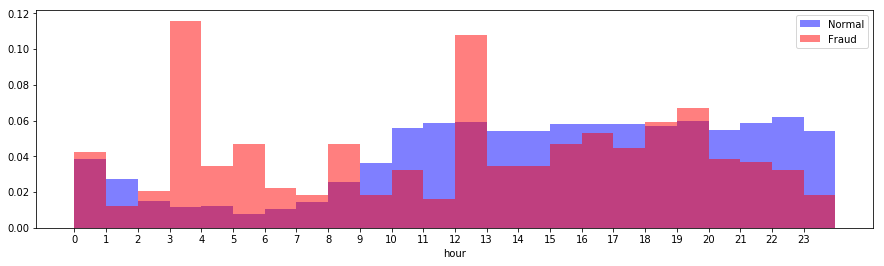

In [7]:
# The distribution of amount in each hour
data['hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24) 
# A lambda function is a small anonymous function. A lambda function can take any number of arguments, but can only have one expression.
# ceil: upward take integra
data.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')# take the pivot table
bins = np.arange(data['hour'].min(),data['hour'].max()+2)
plt.figure(figsize=(15,4))
sns.distplot(data[data['Class']==0.0]['hour'],
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='Normal')
# kde: kernel density estimation
sns.distplot(data[data['Class']==1.0]['hour'],
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             label='Fraud',
             hist_kws={'alpha':.5})
plt.xticks(range(0,24))
plt.legend()

Text(0, 0.5, 'Frequency')

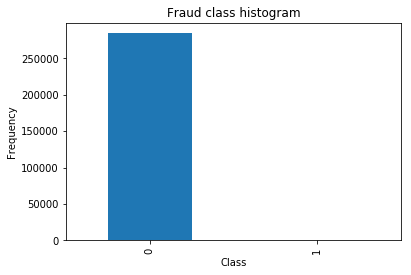

In [8]:
# Frequency Unbalance Display
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

### Solution for unbalanced data

+ More data
+ Use the weights parameters
+ Changing the performance metric: <br>
 * Precion <br>
 * F1-score <br>
 * ROC curve<br>
+ Resampling Method:<br>
 * over-sampling<br>
 * under-sampling<br>
 * SMOTE
